# Анализ таблицы на все доступные даты

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters # для преобразования даты и времени
%matplotlib inline
register_matplotlib_converters()

1. Поулучим список всех доступных дат, за которые возможно провести анализ

In [2]:
date = []

In [3]:
for i in os.listdir(r'Excel'):
    x = i[-15:-5]
    date.append(x)
date

['18.09.2019',
 '30.09.2019',
 '03.10.2019',
 '16.10.2019',
 '22.10.2019',
 '29.10.2019',
 '06.11.2019',
 '11.11.2019',
 '26.11.2019',
 '03.12.2019',
 '09.12.2019',
 '10.12.2019',
 '17.12.2019']

2. Получим все таблицы в виде словаря

In [4]:
result = {}
for i in date:
    path = 'Output\\' + i + '\\' + i
    result[i + '_alldoc'] = pd.read_csv(path + '_Все_документы' + '.csv', header=[0, 1], index_col=0, encoding='cp1251') # Таблица с общим количеством документов
    result[i + '_allper'] = pd.read_csv(path + '_Все_документы_%' + '.csv', header=[0, 1], index_col=0, encoding='cp1251') # Таблица с общим количеством документов в процентах
    result[i + '_podrall'] = pd.read_csv(path + '_Все_документы_подр' + '.csv', header=[0, 1], index_col=0, encoding='cp1251')# Таблица с документами по подразделениям (общее) #######
    result[i + '_podrprall'] = pd.read_csv(path + '_Все_документы_подр_общ_%' + '.csv', header=[0, 1], index_col=0, encoding='cp1251')# Таблица с документами по подразделениям в процентах (от общего количества по всему проекту)
    result[i + '_podrpr'] = pd.read_csv(path + '_Все_документы_подр_%' + '.csv', header=[0, 1], index_col=0, encoding='cp1251')# Готовность документов в процентах (по подразделениям) ######
    result[i + '_isp'] = pd.read_csv(path + '_Все_документы_исп' + '.csv', header=[0, 1], index_col=[0, 1], encoding='cp1251')# Состояние готовности документации по исполнителям !!!!!!!!!!!!!!!!!!!!!!!!!!!

3. Произведем слияния таблиц всех документов по проекту

In [5]:
# функция возвращает слитые в одну таблицу сводные показатели переданных названий таблиц за разные даты
def table_merge(string):
    res = []
    count = 0
    for k, v in result.items():
        if string in k:
            res.append(v)
    return pd.concat(res, axis=1)

## График "сгорания"

График "сгорания" отражает ход разработки КД.

### График "сгорания" по подразделениям

In [6]:
podrall = table_merge('podrall')

In [7]:
podrall

18.09.2019                             30.09.2019  \
                 Документов готово Документов не готово Документов готово   
Подразделение                                                               
НТЦ ИКС НК                     285                  592               285   
ПКО                           1781                  398              2360   
РИМАП                          875                  194               873   
Серийное изделие                38                    0                38   

                                             03.10.2019                       \
                 Документов не готово Документов готово Документов не готово   
Подразделение                                                                  
НТЦ ИКС НК                        591               285                  603   
ПКО                               252              2357                  264   
РИМАП                             196               873                  196   
Серийное изделие                    0                38                    0   

                        16.10.2019                             22.10.2019  \
                 Документов готово Документов не готово Документов готово   
Подразделение                                                               
НТЦ ИКС НК                     294                  577               295   
ПКО                           2271                  177              2172   
РИМАП                          867                  182               857   
Серийное изделие                38                    0                38   

                                       ...        26.11.2019  \
                 Документов не готово  ... Документов готово   
Подразделение                          ...                     
НТЦ ИКС НК                        588  ...               261   
ПКО                               199  ...              2157   
РИМАП                             185  ...               865   
Серийное изделие                    0  ...                32   

                                             03.12.2019                       \
                 Документов не готово Документов готово Документов не готово   
Подразделение                                                                  
НТЦ ИКС НК                        620               261                  620   
ПКО                               208              2146                  212   
РИМАП                             185               865                  185   
Серийное изделие                    0                32                    0   

                        09.12.2019                             10.12.2019  \
                 Документов готово Документов не готово Документов готово   
Подразделение                                                               
НТЦ ИКС НК                     261                  620               261   
ПКО                           2149                  217              2149   
РИМАП                          865                  185               865   
Серийное изделие                32                    0                32   

                                             17.12.2019                       
                 Документов не готово Документов готово Документов не готово  
Подразделение                                                                 
НТЦ ИКС НК                        620               261                  620  
ПКО                               217              2153                  236  
РИМАП                             185               864                  181  
Серийное изделие                    0                32                    0  

[4 rows x 26 columns]

In [8]:
# напишем функцию, которая будет возвращать значения неготовых документов на каждую дату для конкретного подразделения
def podr_clean(podrall, string):
    """
    В функцию передается таблица со всеми подразделениями, вторым аргументом передается имя конкретного подразделения
    """
    lst = [] # список, в который будут записаны промежуточные значения
    res = podrall.loc[string] # выбираем подразделение
    res.index = [i[0] for i in res.index] # оставляем только дату
    for i in date:
        lst.append(res[[i, 'Документов не готово']][1:2]) # Добавляем строки с неготовыми документами на конкретную дату
    return pd.concat(lst)

In [9]:
fire_curve = {} # словарь, в который попадут все данные по не сделанным документам
for i in podrall.index: # вызовем функцию для всех подразделений и запишем результат в словарь
    fire_curve[i] = podr_clean(podrall, i)
fire_curve

c:\users\rusancovs\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:1152: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


{'НТЦ ИКС НК': 18.09.2019    592.0
 30.09.2019    591.0
 03.10.2019    603.0
 16.10.2019    577.0
 22.10.2019    588.0
 29.10.2019    588.0
 06.11.2019    598.0
 11.11.2019    595.0
 26.11.2019    620.0
 03.12.2019    620.0
 09.12.2019    620.0
 10.12.2019    620.0
 17.12.2019    620.0
 Name: НТЦ ИКС НК, dtype: float64, 'ПКО': 18.09.2019    398.0
 30.09.2019    252.0
 03.10.2019    264.0
 16.10.2019    177.0
 22.10.2019    199.0
 29.10.2019    187.0
 06.11.2019    204.0
 11.11.2019    204.0
 26.11.2019    208.0
 03.12.2019    212.0
 09.12.2019    217.0
 10.12.2019    217.0
 17.12.2019    236.0
 Name: ПКО, dtype: float64, 'РИМАП': 18.09.2019    194.0
 30.09.2019    196.0
 03.10.2019    196.0
 16.10.2019    182.0
 22.10.2019    185.0
 29.10.2019    185.0
 06.11.2019    188.0
 11.11.2019    188.0
 26.11.2019    185.0
 03.12.2019    185.0
 09.12.2019    185.0
 10.12.2019    185.0
 17.12.2019    181.0
 Name: РИМАП, dtype: float64, 'Серийное изделие': 18.09.2019    0.0
 30.09.2019    0.0
 03

In [10]:
res = pd.DataFrame(fire_curve) # преобразуем словарь с таблицами в объект DF
res

,НТЦ ИКС НК,ПКО,РИМАП,Серийное изделие
18.09.2019,592.0,398.0,194.0,0.0
30.09.2019,591.0,252.0,196.0,0.0
03.10.2019,603.0,264.0,196.0,0.0
16.10.2019,577.0,177.0,182.0,0.0
22.10.2019,588.0,199.0,185.0,0.0
29.10.2019,588.0,187.0,185.0,0.0
06.11.2019,598.0,204.0,188.0,0.0
11.11.2019,595.0,204.0,188.0,0.0
26.11.2019,620.0,208.0,185.0,0.0
03.12.2019,620.0,212.0,185.0,0.0


In [11]:
date_old = list(res.index)
date_new = []
for i in date_old:
    x = i.replace('.', '/')
    date_new.append(x)
date_new

['18/09/2019',
 '30/09/2019',
 '03/10/2019',
 '16/10/2019',
 '22/10/2019',
 '29/10/2019',
 '06/11/2019',
 '11/11/2019',
 '26/11/2019',
 '03/12/2019',
 '09/12/2019',
 '10/12/2019',
 '17/12/2019']

In [12]:
# Изменим индексы со строк на даты
res.index = pd.to_datetime(date_new, format='%d/%m/%Y')
res.index

DatetimeIndex(['2019-09-18', '2019-09-30', '2019-10-03', '2019-10-16',
               '2019-10-22', '2019-10-29', '2019-11-06', '2019-11-11',
               '2019-11-26', '2019-12-03', '2019-12-09', '2019-12-10',
               '2019-12-17'],
              dtype='datetime64[ns]', freq=None)

In [13]:
res

,НТЦ ИКС НК,ПКО,РИМАП,Серийное изделие
2019-09-18,592.0,398.0,194.0,0.0
2019-09-30,591.0,252.0,196.0,0.0
2019-10-03,603.0,264.0,196.0,0.0
2019-10-16,577.0,177.0,182.0,0.0
2019-10-22,588.0,199.0,185.0,0.0
2019-10-29,588.0,187.0,185.0,0.0
2019-11-06,598.0,204.0,188.0,0.0
2019-11-11,595.0,204.0,188.0,0.0
2019-11-26,620.0,208.0,185.0,0.0
2019-12-03,620.0,212.0,185.0,0.0


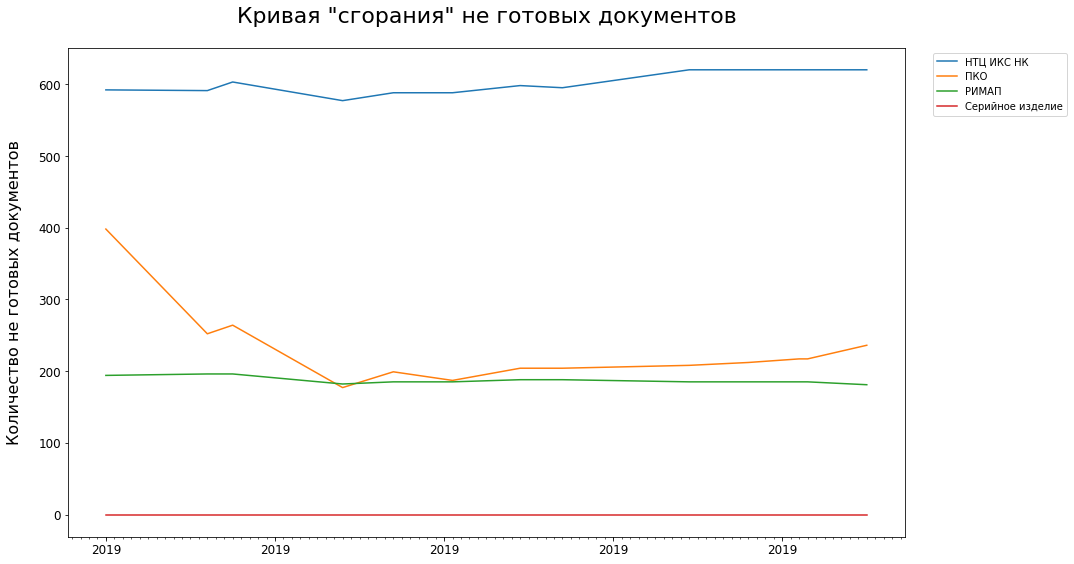

In [15]:
fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(res)
ax.set_ylabel('Количество не готовых документов', fontsize=16, labelpad = 16) # задать название по оси Y  и размер шрифта
# ax.set_xlabel('Дата', fontsize=16, labelpad = 5)
ax.set_title('Кривая "сгорания" не готовых документов', pad=25, fontsize=22)
ax.tick_params(labelsize=12)
# ограничим количество меток по оси x
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
# plt.grid()

ax.legend(labels=res.columns, bbox_to_anchor=(1.2, 1));